Prediction of back pain using Logistic Regression, Python

In [116]:
model_res

,Train_Score,Test_Score,Precision,Recall,F1,Mcc,ROC_AUC
Model_8,0.843,0.785,0.957,0.714,0.818,0.606,0.87
Model_7,0.866,0.763,0.918,0.714,0.803,0.544,0.876
Model_6,0.857,0.774,0.875,0.778,0.824,0.52,0.871
Model_5,0.839,0.774,0.875,0.778,0.824,0.52,0.874
Model_4,0.848,0.785,0.891,0.778,0.831,0.549,0.865


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import matthews_corrcoef

In [2]:
back_data = pd.read_csv("Dataset_spine.csv")

In [3]:
back_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Col1         310 non-null    float64
 1   Col2         310 non-null    float64
 2   Col3         310 non-null    float64
 3   Col4         310 non-null    float64
 4   Col5         310 non-null    float64
 5   Col6         310 non-null    float64
 6   Col7         310 non-null    float64
 7   Col8         310 non-null    float64
 8   Col9         310 non-null    float64
 9   Col10        310 non-null    float64
 10  Col11        310 non-null    float64
 11  Col12        310 non-null    float64
 12  Class_att    310 non-null    object 
 13  Unnamed: 13  14 non-null     object 
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [4]:
back_data.head(2)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN


In [5]:
back_data.isna().sum()

Col1             0
Col2             0
Col3             0
Col4             0
Col5             0
Col6             0
Col7             0
Col8             0
Col9             0
Col10            0
Col11            0
Col12            0
Class_att        0
Unnamed: 13    296
dtype: int64

In [6]:
back_data.drop(labels=["Unnamed: 13"],axis=1,inplace=True)

In [7]:
back_data.head(2)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal


In [8]:
back_data.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [9]:
back_data.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status']

In [10]:
back_data.head(2)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal


In [11]:
back_data.shape

(310, 13)

In [12]:
def plot_box(variable):
    sns.boxplot(x=back_data[variable])
    plt.show()

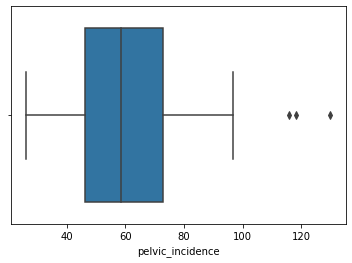

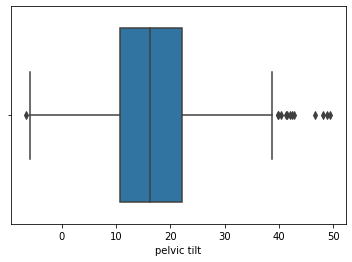

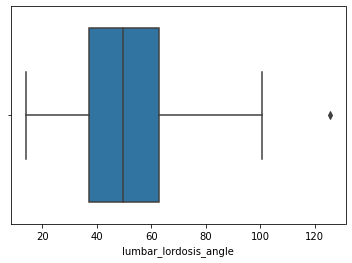

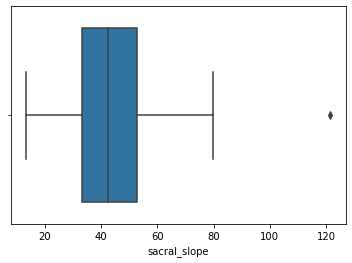

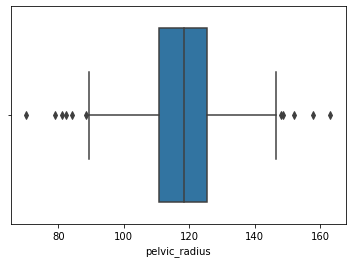

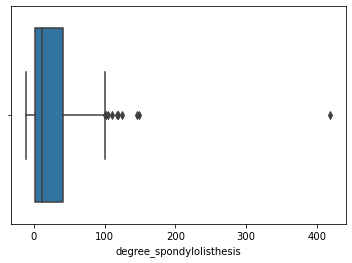

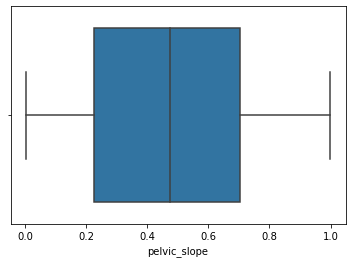

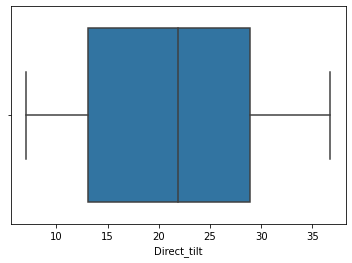

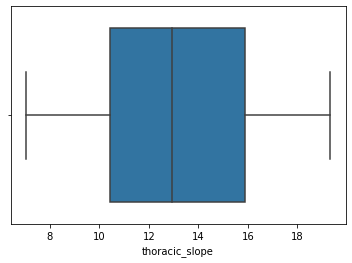

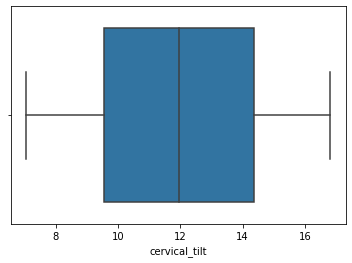

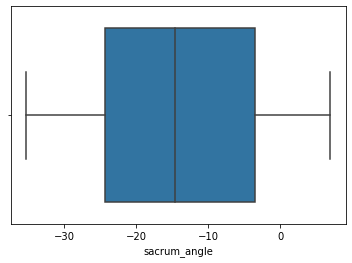

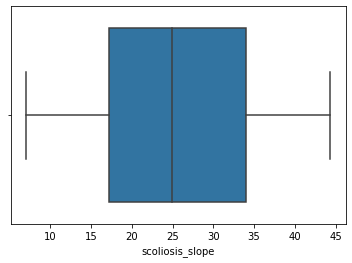

In [13]:
for i in back_data.columns:
    if i != 'Status':
        plot_box(i)

<AxesSubplot:xlabel='Status', ylabel='count'>

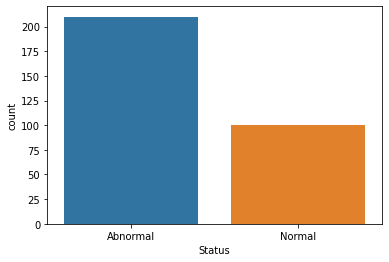

In [14]:
sns.countplot(x=back_data.Status)

<AxesSubplot:>

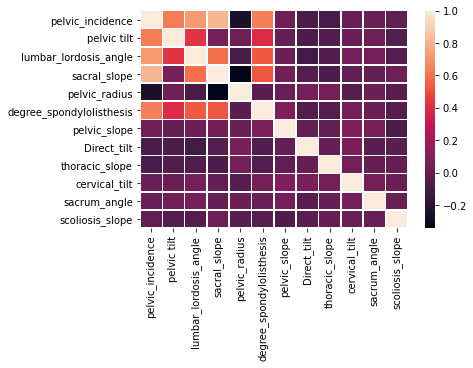

In [15]:
sns.heatmap(data=back_data.corr(),linewidths=.5)

In [16]:
back_data.groupby('Status').mean()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Status,,,,,,,,,,,,
Abnormal,64.692562,19.791111,55.925370,44.90145,115.077713,37.777705,0.483979,21.085875,12.948913,12.132737,-13.826677,25.146915
Normal,51.685244,12.821414,43.542605,38.86383,123.890834,2.186572,0.449880,21.816394,13.307268,11.514534,-14.528711,26.694019


In [17]:
back_data.groupby('Status').median()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Status,,,,,,,,,,,,
Abnormal,65.274888,18.798899,56.150000,44.639597,115.650323,31.946516,0.501280,21.7506,12.77005,11.973735,-14.892070,24.50940
Normal,50.123115,13.482435,42.638923,37.059694,123.874328,1.152710,0.418732,22.4146,13.40975,11.330750,-13.974694,27.72795


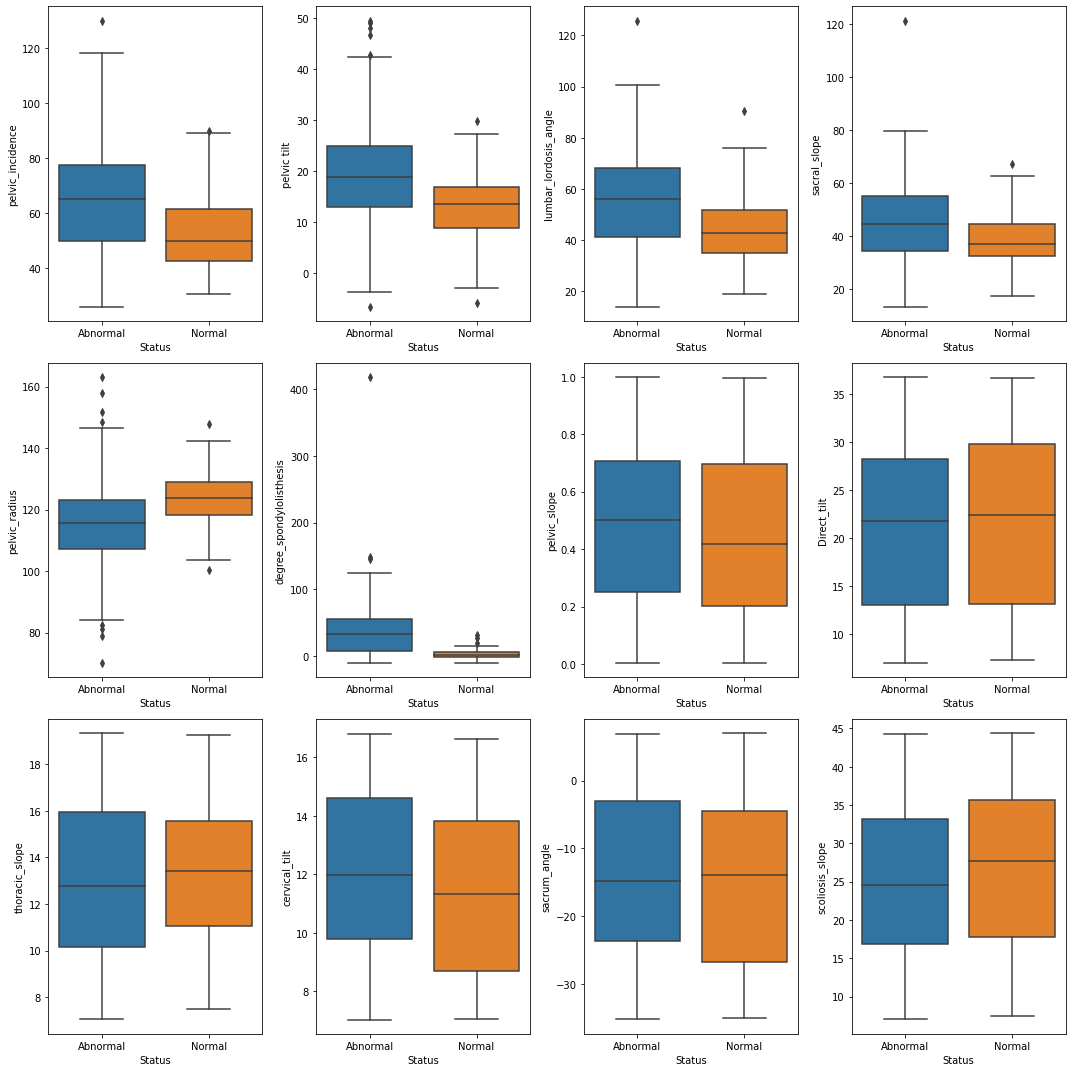

In [18]:
fig, axes = plt.subplots(3, 4, figsize = (15,15))
axes = axes.flatten()

for i in range(0,len(back_data.columns)-1):
    sns.boxplot(x="Status", y=back_data.iloc[:,i], data=back_data, orient='v', ax=axes[i])

plt.tight_layout()
plt.show()

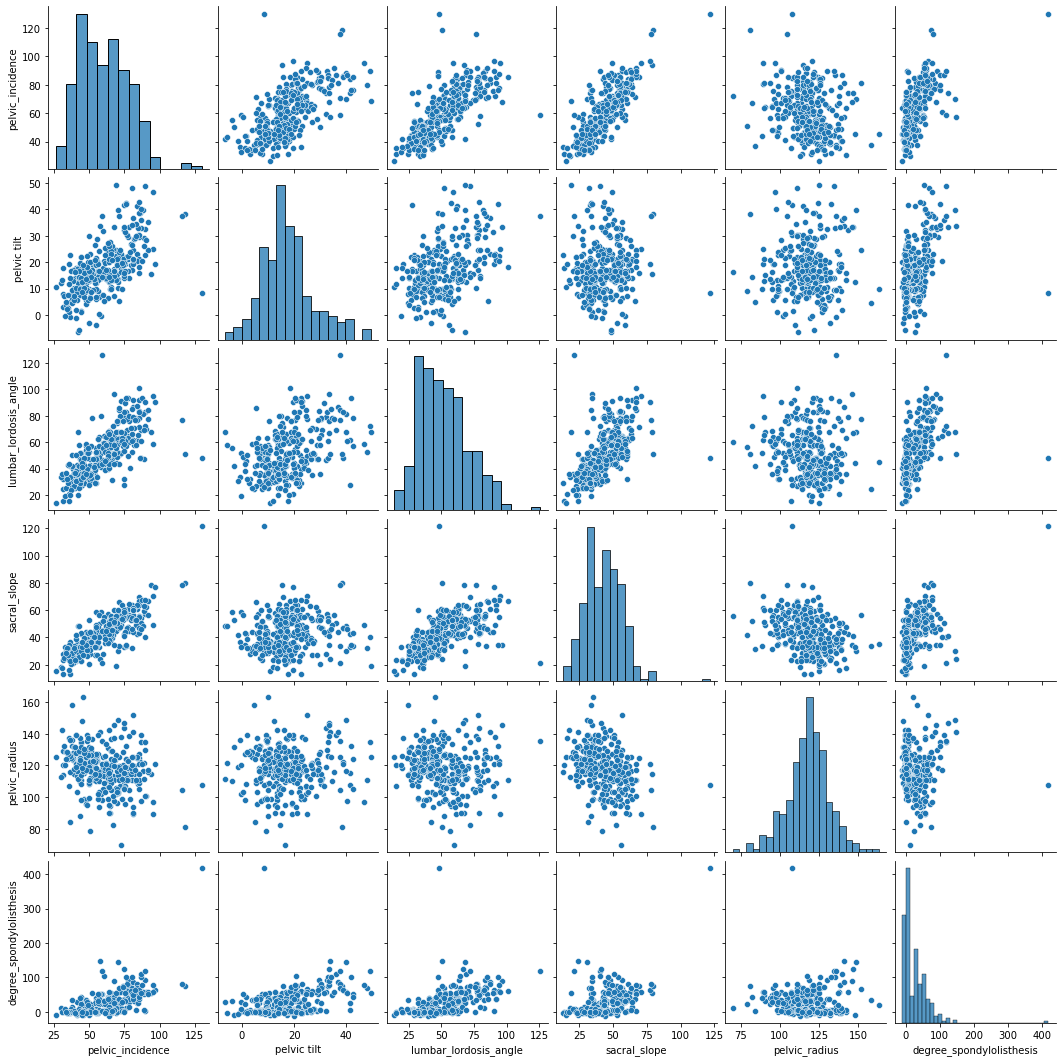

In [19]:
sns.pairplot(data=back_data.loc[:,'pelvic_incidence':'degree_spondylolisthesis'])

In [20]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [21]:
def data_preprocess(X,y,std_scale=False,minmax_scale=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    if std_scale or minmax_scale:
        if std_scale:
            scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
        else:
            scaler = MinMaxScaler(copy=True,feature_range=(0,1))
            
        scaler.fit(X_train)

        # Now apply the transformations to the data:
        train_scaled = scaler.transform(X_train)
        test_scaled = scaler.transform(X_test)
    else:
        train_scaled, test_scaled = X_train, X_test
        
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    
    return(train_scaled, test_scaled, y_train, y_test)

In [22]:
def logistic_regression(x,y,cls_weight=None):
    logreg = LogisticRegression(class_weight=cls_weight).fit(x, y)
    return(logreg)

In [23]:
def get_cm_results(met):
    tp,fn,fp,tn=met.reshape(-1)
    over_all_acc=round((tp+tn)/(tp+fn+fp+tn),3)
    precision=round(tp/(tp+fp),3)
    recall=round(tp/(tp+fn),3)
    f1=round(2/((1/recall)+(1/precision)),3)
    return f"Over_All_Accuracy: {over_all_acc}, Precision: {precision}, Recall: {recall}, F1: {f1}"

In [24]:
def y_pred_conversion(x_test):
    # assigning the model predicted values to y_pred
    y_pred = logreg_result.predict(x_test)

    # assigning the string Normal and Abnormal to the 0 and 1 values respectively. This is useful in plotting 
    # the confusion matrix
    y_pred_string = y_pred.astype(str)
    y_pred_string[np.where(y_pred_string == '0')] = 'Normal'
    y_pred_string[np.where(y_pred_string == '1')] = 'Abnormal'

    y_test_string = y_test.astype(str)
    y_test_string = y_test_string.values
    y_test_string[np.where(y_test_string == '0')] = 'Normal'
    y_test_string[np.where(y_test_string == '1')] = 'Abnormal'
    
    return y_pred, y_pred_string, y_test_string

In [25]:
def plot_conf_met(y_test,y_pred):
    # Gauging model accuracy
    ax= plt.subplot()
    labels = ['Abnormal','Normal']
    cm = confusion_matrix(y_test, y_pred, labels)
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Abnormal', 'Normal']); ax.yaxis.set_ticklabels(['Abnormal', 'Normal']);
    plt.show()
    return cm

In [26]:
back_data.loc[back_data.Status=='Abnormal','Status'] = 1
back_data.loc[back_data.Status=='Normal','Status'] = 0

# Model 1
-> With all X variables

Observation:
> The above model did not converge because some variables were highly correlated with each other and this would have led to the correlation/ covariance matrix to be singular.

> A matrix can become singular if any rows(columns) can be expressed as a linear combination of any other rows (columns).

> In fact, it was very intersting to note that in our data, the Pelvic Incidence column values are an exact sum of Pelvic Tilt and Sacral Slope. So that explains.

> Also in our statistical test results, the Standard error values are very high and p-value is 1 for these three variables. Hence we will remove them and re run the model.

In [27]:
x = back_data.loc[:, back_data.columns != "Status"]
y = back_data.loc[:, back_data.columns == "Status"]

In [28]:
calc_vif(x)

/home/prashanth/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,pelvic_incidence,inf
1,pelvic tilt,inf
2,lumbar_lordosis_angle,19.443921
3,sacral_slope,inf
4,pelvic_radius,34.370439
5,degree_spondylolisthesis,2.436405
6,pelvic_slope,3.811737
7,Direct_tilt,7.225984
8,thoracic_slope,15.107876
9,cervical_tilt,16.778145


In [29]:
x_train, x_test, y_train, y_test = data_preprocess(x,y)

In [31]:
logreg_res=logistic_regression(x_train,y_train)

/home/prashanth/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/prashanth/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
print("Training set score: {:.3f}".format(logreg_res.score(x_train,y_train)))
print("Test set score: {:.3f}".format(logreg_res.score(x_test,y_test)))

Training set score: 0.871
Test set score: 0.796


In [35]:
# Although the model prediction scores are high, We do not have proper evidence on which independent variable
# has influence on predicting the target variable
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
result.summary2()

         Current function value: 0.298731
         Iterations: 35


/home/prashanth/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
=====================================================================================
Model:                      Logit                  Pseudo R-squared:       0.525     
Dependent Variable:         Status                 AIC:                    153.6491  
Date:                       2020-11-26 19:19       BIC:                    194.2079  
No. Observations:           217                    Log-Likelihood:         -64.825   
Df Model:                   11                     LL-Null:                -136.45   
Df Residuals:               205                    LLR p-value:            3.5513e-25
Converged:                  0.0000                 Scale:                  1.0000    
No. Iterations:             35.0000                                                  
-------------------------------------------------------------------------------------
                          Coef.     Std.Err.     z    P>|z|     [0.025       0.975]  
-------------------------------------------------------------------------------------
pelvic_incidence          12.8643 144550.9260  0.0001 0.9999 -283301.7446 283327.4732
pelvic tilt              -12.7472 144550.9260 -0.0001 0.9999 -283327.3560 283301.8617
lumbar_lordosis_angle     -0.0513      0.0286 -1.7897 0.0735      -0.1074      0.0049
sacral_slope             -12.8757 144550.9260 -0.0001 0.9999 -283327.4846 283301.7332
pelvic_radius             -0.0231      0.0117 -1.9647 0.0494      -0.0461     -0.0001
degree_spondylolisthesis   0.1859      0.0320  5.8080 0.0000       0.1232      0.2487
pelvic_slope               0.2282      0.8277  0.2757 0.7828      -1.3941      1.8505
Direct_tilt               -0.0096      0.0280 -0.3417 0.7326      -0.0645      0.0453
thoracic_slope             0.0518      0.0715  0.7241 0.4690      -0.0883      0.1919
cervical_tilt              0.2089      0.0820  2.5488 0.0108       0.0483      0.3696
sacrum_angle              -0.0072      0.0188 -0.3833 0.7015      -0.0440      0.0296
scoliosis_slope           -0.0265      0.0223 -1.1877 0.2350      -0.0702      0.0172
=====================================================================================

"""

# Model 2
-> With Standard scaling of all x variables

Observation :
> This model has reached its convergence limitation and so we cannot move ahead with this approach.

In [36]:
x = back_data.loc[:, back_data.columns != "Status"]
y = back_data.loc[:, back_data.columns == "Status"]

In [37]:
x_train_scaled, x_test_scaled, y_train, y_test = data_preprocess(x,y,std_scale=True)

In [38]:
calc_vif(x)

/home/prashanth/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,pelvic_incidence,inf
1,pelvic tilt,inf
2,lumbar_lordosis_angle,19.443921
3,sacral_slope,inf
4,pelvic_radius,34.370439
5,degree_spondylolisthesis,2.436405
6,pelvic_slope,3.811737
7,Direct_tilt,7.225984
8,thoracic_slope,15.107876
9,cervical_tilt,16.778145


In [39]:
logreg_res=logistic_regression(x_train_scaled,y_train)

/home/prashanth/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [40]:
print("Training set score: {:.3f}".format(logreg_res.score(x_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_res.score(x_test_scaled,y_test)))

Training set score: 0.876
Test set score: 0.817


In [41]:
logit_model = sm.Logit(y_train, x_train_scaled)
result = logit_model.fit()
result.summary2()

         Current function value: 0.473055
         Iterations: 35


/home/prashanth/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.248     
Dependent Variable:   Status            AIC:               229.3058  
Date:                 2020-11-26 19:19  BIC:               269.8646  
No. Observations:     217               Log-Likelihood:    -102.65   
Df Model:             11                LL-Null:           -136.45   
Df Residuals:         205               LLR p-value:       3.4943e-10
Converged:            0.0000            Scale:             1.0000    
No. Iterations:       35.0000                                        
---------------------------------------------------------------------
     Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------
x1   0.0814 12379592.3293  0.0000 1.0000 -24263555.0273 24263555.1901
x2   0.0765  7056301.6350  0.0000 1.0000 -13830096.9921 13830097.1452
x3  -0.2797        0.3142 -0.8904 0.3733        -0.8955        0.3361
x4  -0.5412  9740438.7621 -0.0000 1.0000 -19090909.7085 19090908.6261
x5  -1.1234        0.2351 -4.7773 0.0000        -1.5842       -0.6625
x6   2.3250        0.4401  5.2832 0.0000         1.4625        3.1875
x7   0.1711        0.1790  0.9561 0.3390        -0.1797        0.5220
x8  -0.2115        0.1770 -1.1950 0.2321        -0.5583        0.1354
x9   0.0724        0.1738  0.4166 0.6770        -0.2683        0.4131
x10  0.2003        0.1772  1.1301 0.2584        -0.1471        0.5476
x11 -0.1042        0.1804 -0.5778 0.5634        -0.4578        0.2493
x12 -0.2749        0.1764 -1.5579 0.1193        -0.6207        0.0709
=====================================================================

"""

# Model 3
-> Removing Highly co-related variables[x1,x2,x4] from the above logit result summary.

-> Have applied std scaling

Observation:
> No scaling to X variables gave us convergence error

> Min Max scaling results were poorer than std scaling results

In [42]:
x = back_data[[cols for cols in back_data.columns if cols not in ['pelvic_incidence',
                                                                 'pelvic tilt',
                                                                 'sacral_slope',
                                                                 'Status']]]

In [44]:
calc_vif(x)

,variables,VIF
0,lumbar_lordosis_angle,11.264427
1,pelvic_radius,33.384464
2,degree_spondylolisthesis,2.082637
3,pelvic_slope,3.778602
4,Direct_tilt,7.090099
5,thoracic_slope,14.775601
6,cervical_tilt,16.635477
7,sacrum_angle,2.290156
8,scoliosis_slope,6.673978


In [45]:
x_train_scaled, x_test_scaled, y_train, y_test = data_preprocess(x,y,std_scale=True)

logreg_result = logistic_regression(x_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(x_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(x_test_scaled,y_test)))

Training set score: 0.848
Test set score: 0.753


/home/prashanth/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [46]:
logit_model = sm.Logit(y_train, x_train_scaled)
result = logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.481933
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.234     
Dependent Variable: Status           AIC:              227.1591  
Date:               2020-11-26 19:20 BIC:              257.5781  
No. Observations:   217              Log-Likelihood:   -104.58   
Df Model:           8                LL-Null:          -136.45   
Df Residuals:       208              LLR p-value:      8.5613e-11
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.5434      0.2568    -2.1158    0.0344    -1.0468    -0.0400
x2    -0.9642      0.2080    -4.6364    0.0000    -1.3719    -0.5566
x3     2.2963      0.4142     5.5443    0.0000     1.4846     3.1081
x4     0.1499      0.1771     0.8464    0.3974    -0.1972     0.4971
x5    -0.2442      0.1738    -1.4047    0.1601    -0.5849     0.0965
x6     0.0640      0.1732     0.3694    0.7118    -0.2754     0.4034
x7     0.2068      0.1747     1.1841    0.2364    -0.1355     0.5491
x8    -0.1183      0.1777    -0.6660    0.5054    -0.4666     0.2299
x9    -0.2872      0.1736    -1.6547    0.0980    -0.6274     0.0530
=================================================================

"""

In [47]:
y_pred, y_pred_string, y_test_string = y_pred_conversion(x_test_scaled)

/home/prashanth/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=['Abnormal', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


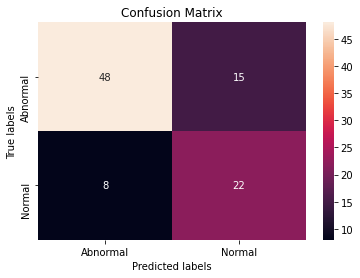

Over_All_Accuracy: 0.753, Precision: 0.857, Recall: 0.762, F1: 0.807
MCC: 0.473


In [48]:
cm=plot_conf_met(y_test_string,y_pred_string)
print(get_cm_results(cm))
print("MCC:",round(matthews_corrcoef(y_test_string, y_pred_string),3))

# Model 4
-> Having only [x1,x2,x3,x7] after observing the logit fit summary from above model

-> Have applied std scaling. Other scalings were poorer in terms of model scores.

Observation:
> The model accuracy results are better but AIC,BIC values are very high.

> The x4 is significantly very ineffective to predict y.

In [49]:
x=back_data[['lumbar_lordosis_angle','pelvic_radius','degree_spondylolisthesis','cervical_tilt']]

In [50]:
calc_vif(x)

,variables,VIF
0,lumbar_lordosis_angle,11.177226
1,pelvic_radius,18.388146
2,degree_spondylolisthesis,2.059566
3,cervical_tilt,15.156325


In [51]:
x_train_scaled, x_test_scaled, y_train, y_test = data_preprocess(x,y,std_scale=True)

logreg_result = logistic_regression(x_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(x_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(x_test_scaled,y_test)))

Training set score: 0.848
Test set score: 0.785


/home/prashanth/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [53]:
logit_model = sm.Logit(y_train, x_train_scaled)
result = logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.494667
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.213     
Dependent Variable: Status           AIC:              222.6855  
Date:               2020-11-26 19:20 BIC:              236.2050  
No. Observations:   217              Log-Likelihood:   -107.34   
Df Model:           3                LL-Null:          -136.45   
Df Residuals:       213              LLR p-value:      1.4152e-12
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.4536      0.2442    -1.8578    0.0632    -0.9322     0.0249
x2    -0.9076      0.2023    -4.4867    0.0000    -1.3041    -0.5111
x3     2.1889      0.3953     5.5367    0.0000     1.4140     2.9638
x4     0.2150      0.1693     1.2697    0.2042    -0.1169     0.5469
=================================================================

"""

In [54]:
y_pred, y_pred_string, y_test_string = y_pred_conversion(x_test_scaled)

/home/prashanth/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=['Abnormal', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


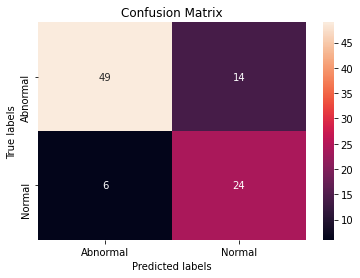

Over_All_Accuracy: 0.785, Precision: 0.891, Recall: 0.778, F1: 0.831
MCC: 0.549


In [55]:
cm=plot_conf_met(y_test_string,y_pred_string)
print(get_cm_results(cm))
print("MCC:",round(matthews_corrcoef(y_test_string, y_pred_string),3))

Logistic: ROC AUC=0.865


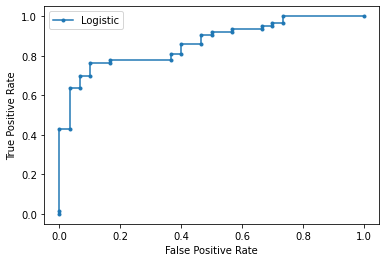

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = logreg_result.predict_proba(x_test_scaled)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Model 5

-> No scaling on x variables.

Observation:

> Min Max scaling results were poorer than std scaling results

In [70]:
x=back_data[['lumbar_lordosis_angle','pelvic_radius','degree_spondylolisthesis']]

In [71]:
calc_vif(x)

,variables,VIF
0,lumbar_lordosis_angle,10.750925
1,pelvic_radius,8.370022
2,degree_spondylolisthesis,2.058525


In [72]:
x_train_scaled, x_test_scaled, y_train, y_test = data_preprocess(x,y)

logreg_result = logistic_regression(x_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(x_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(x_test_scaled,y_test)))

Training set score: 0.839
Test set score: 0.774


/home/prashanth/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [73]:
logit_model = sm.Logit(y_train, x_train_scaled)
result = logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.363253
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.422     
Dependent Variable:   Status             AIC:                163.6518  
Date:                 2020-11-26 19:24   BIC:                173.7915  
No. Observations:     217                Log-Likelihood:     -78.826   
Df Model:             2                  LL-Null:            -136.45   
Df Residuals:         214                LLR p-value:        9.4278e-26
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       9.0000                                           
-----------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------------
lumbar_lordosis_angle    -0.0292   0.0166 -1.7587 0.0786 -0.0618 0.0033
pelvic_radius             0.0031   0.0056  0.5492 0.5829 -0.0079 0.0140
degree_spondylolisthesis  0.1466   0.0256  5.7356 0.0000  0.0965 0.1967
=======================================================================

"""

In [74]:
y_pred, y_pred_string, y_test_string = y_pred_conversion(x_test_scaled)

/home/prashanth/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=['Abnormal', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


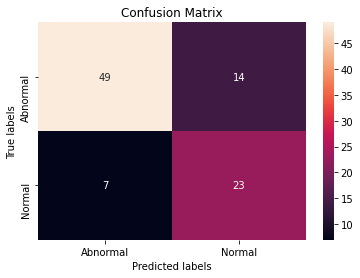

Over_All_Accuracy: 0.774, Precision: 0.875, Recall: 0.778, F1: 0.824
MCC: 0.52


In [75]:
cm=plot_conf_met(y_test_string,y_pred_string)
print(get_cm_results(cm))
print("MCC:",round(matthews_corrcoef(y_test_string, y_pred_string),3))

Logistic: ROC AUC=0.874


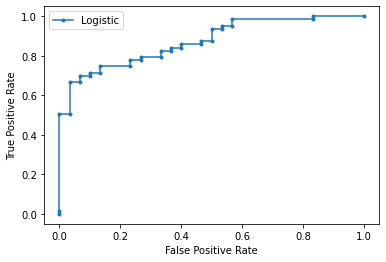

In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = logreg_result.predict_proba(x_test_scaled)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Model 6

-> Standard scaling on x variables.

Observation:

> Min Max scaling results were poorer than std scaling results

In [79]:
x=back_data[['lumbar_lordosis_angle','pelvic_radius','degree_spondylolisthesis']]

In [80]:
calc_vif(x)

,variables,VIF
0,lumbar_lordosis_angle,10.750925
1,pelvic_radius,8.370022
2,degree_spondylolisthesis,2.058525


In [81]:
x_train_scaled, x_test_scaled, y_train, y_test = data_preprocess(x,y,std_scale=True)

logreg_result = logistic_regression(x_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(x_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(x_test_scaled,y_test)))

Training set score: 0.857
Test set score: 0.774


/home/prashanth/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [82]:
logit_model = sm.Logit(y_train, x_train_scaled)
result = logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.498420
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.207     
Dependent Variable: Status           AIC:              222.3145  
Date:               2020-11-26 19:32 BIC:              232.4542  
No. Observations:   217              Log-Likelihood:   -108.16   
Df Model:           2                LL-Null:          -136.45   
Df Residuals:       214              LLR p-value:      5.1622e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.4688      0.2426    -1.9325    0.0533    -0.9443     0.0067
x2    -0.9188      0.2037    -4.5100    0.0000    -1.3181    -0.5195
x3     2.1897      0.3937     5.5626    0.0000     1.4182     2.9613
=================================================================

"""

In [83]:
y_pred, y_pred_string, y_test_string = y_pred_conversion(x_test_scaled)

/home/prashanth/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=['Abnormal', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


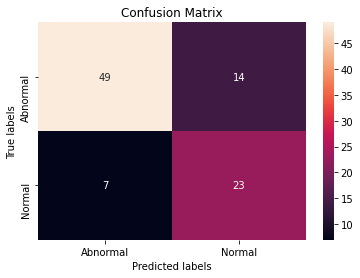

Over_All_Accuracy: 0.774, Precision: 0.875, Recall: 0.778, F1: 0.824
MCC: 0.52


In [84]:
cm=plot_conf_met(y_test_string,y_pred_string)
print(get_cm_results(cm))
print("MCC:",round(matthews_corrcoef(y_test_string, y_pred_string),3))

Logistic: ROC AUC=0.871


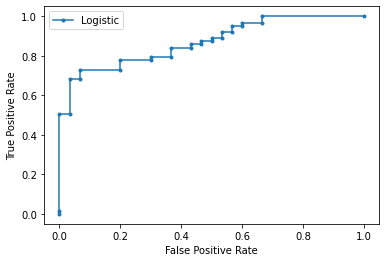

In [85]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = logreg_result.predict_proba(x_test_scaled)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Model 7

-> No scaling on x variables

-> Using class weight in logistic regression

In [86]:
x=back_data[['lumbar_lordosis_angle','pelvic_radius','degree_spondylolisthesis']]

In [87]:
x_train_scaled, x_test_scaled, y_train, y_test = data_preprocess(x,y)

logreg_result = logistic_regression(x_train_scaled, y_train, cls_weight='balanced')

print("Training set score: {:.3f}".format(logreg_result.score(x_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(x_test_scaled,y_test)))

Training set score: 0.866
Test set score: 0.763


/home/prashanth/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [88]:
logit_model = sm.Logit(y_train, x_train_scaled)
result = logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.363253
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.422     
Dependent Variable:   Status             AIC:                163.6518  
Date:                 2020-11-26 19:33   BIC:                173.7915  
No. Observations:     217                Log-Likelihood:     -78.826   
Df Model:             2                  LL-Null:            -136.45   
Df Residuals:         214                LLR p-value:        9.4278e-26
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       9.0000                                           
-----------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------------
lumbar_lordosis_angle    -0.0292   0.0166 -1.7587 0.0786 -0.0618 0.0033
pelvic_radius             0.0031   0.0056  0.5492 0.5829 -0.0079 0.0140
degree_spondylolisthesis  0.1466   0.0256  5.7356 0.0000  0.0965 0.1967
=======================================================================

"""

In [89]:
y_pred, y_pred_string, y_test_string = y_pred_conversion(x_test_scaled)

/home/prashanth/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=['Abnormal', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


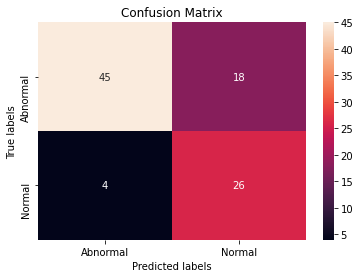

Over_All_Accuracy: 0.763, Precision: 0.918, Recall: 0.714, F1: 0.803
MCC: 0.544


In [90]:
cm=plot_conf_met(y_test_string,y_pred_string)
print(get_cm_results(cm))
print("MCC:",round(matthews_corrcoef(y_test_string, y_pred_string),3))

Logistic: ROC AUC=0.876


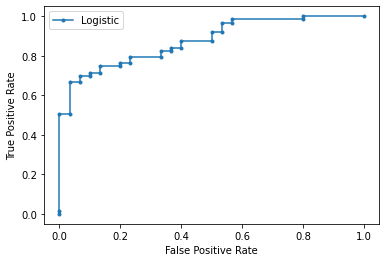

In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = logreg_result.predict_proba(x_test_scaled)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Model 8

-> Standard scaling on x variables

-> Using class weight in logistic regression

In [94]:
x=back_data[['lumbar_lordosis_angle','pelvic_radius','degree_spondylolisthesis']]

In [95]:
x_train_scaled, x_test_scaled, y_train, y_test = data_preprocess(x,y,std_scale=True)

logreg_result = logistic_regression(x_train_scaled, y_train, cls_weight='balanced')

print("Training set score: {:.3f}".format(logreg_result.score(x_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(x_test_scaled,y_test)))

Training set score: 0.843
Test set score: 0.785


/home/prashanth/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [96]:
logit_model = sm.Logit(y_train, x_train_scaled)
result = logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.498420
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.207     
Dependent Variable: Status           AIC:              222.3145  
Date:               2020-11-26 19:36 BIC:              232.4542  
No. Observations:   217              Log-Likelihood:   -108.16   
Df Model:           2                LL-Null:          -136.45   
Df Residuals:       214              LLR p-value:      5.1622e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.4688      0.2426    -1.9325    0.0533    -0.9443     0.0067
x2    -0.9188      0.2037    -4.5100    0.0000    -1.3181    -0.5195
x3     2.1897      0.3937     5.5626    0.0000     1.4182     2.9613
=================================================================

"""

In [97]:
y_pred, y_pred_string, y_test_string = y_pred_conversion(x_test_scaled)

/home/prashanth/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=['Abnormal', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


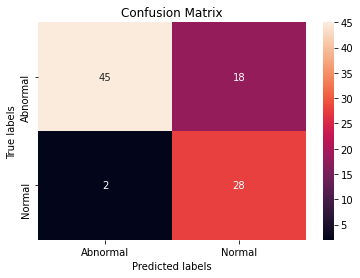

Over_All_Accuracy: 0.785, Precision: 0.957, Recall: 0.714, F1: 0.818
MCC: 0.606


In [98]:
cm=plot_conf_met(y_test_string,y_pred_string)
print(get_cm_results(cm))
print("MCC:",round(matthews_corrcoef(y_test_string, y_pred_string),3))

Logistic: ROC AUC=0.870


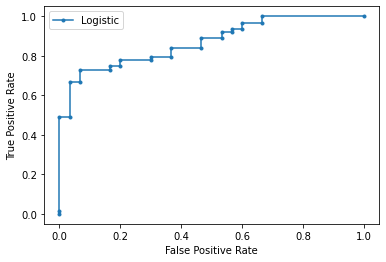

In [99]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = logreg_result.predict_proba(x_test_scaled)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [100]:
model_res=pd.DataFrame(index=['Model_8'],columns=['Train_Score','Test_Score','Precision','Recall','F1','Mcc','ROC_AUC'])

In [101]:
model_res

,Train_Score,Test_Score,Precision,Recall,F1,Mcc,ROC_AUC
Model_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
model_res.loc['Model_8']=np.array([0.843,0.785,0.957,0.714,0.818,0.606,0.870])